In [4]:
from drawing_singlePolicy import DrawingSinglePolicy
from algorithm import Algorithm
from canvas import Canvas

'''
columns = 50
rows = 50

rewards_board = [[' ' for _ in range(columns)] for _ in range(rows)]

# Defino las recompensas de acuerdo a la figura que queremos dibujar.
for i in range(rows):
    for j in range(columns):
        if i == 10 and j >= 10 and j <= 40:
            rewards_board[i][j] = '+1'
        if i == 40 and j >= 10 and j <= 40:
            rewards_board[i][j] = '+1'
        if j == 40 and i >= 10 and i <= 40:
            rewards_board[i][j] = '+1'
        if j == 10 and i >= 10 and i <= 40:
            rewards_board[i][j] = '+1'

rewards_board[0][0] = 'S'

'''

columns = 10
rows = 10

rewards_board = [[' ' for _ in range(columns)] for _ in range(rows)]

# Defino las recompensas de acuerdo a la figura que queremos dibujar.
for i in range(rows):
    for j in range(columns):
        if i == 3 and j >= 3 and j <= 7:
            rewards_board[i][j] = '+1'
        if i == 7 and j >= 3 and j <= 7:
            rewards_board[i][j] = '+1'
        if j == 7 and i >= 3 and i <= 7:
            rewards_board[i][j] = '+1'
        if j == 3 and i >= 3 and i <= 7:
            rewards_board[i][j] = '+1'

rewards_board[0][0] = 'S'



2024-05-12 15:56:11,344 [MainThread] [INFO]  Inicio del entrenamiento. Calculando la política óptima a partir de las recompensas...
2024-05-12 15:56:11,345 [MainThread] [INFO]  Ejecutando POLICY_ITERATION para resolver el MDP
2024-05-12 15:56:11,350 [MainThread] [INFO]  La ejecución de POLICY_ITERATION acaba de terminar. 5 fueron necesarias para alcanzar convergencia
2024-05-12 15:56:11,351 [MainThread] [INFO]  Fin del entrenamiento. Calculando la política óptima a partir de las recompensas...


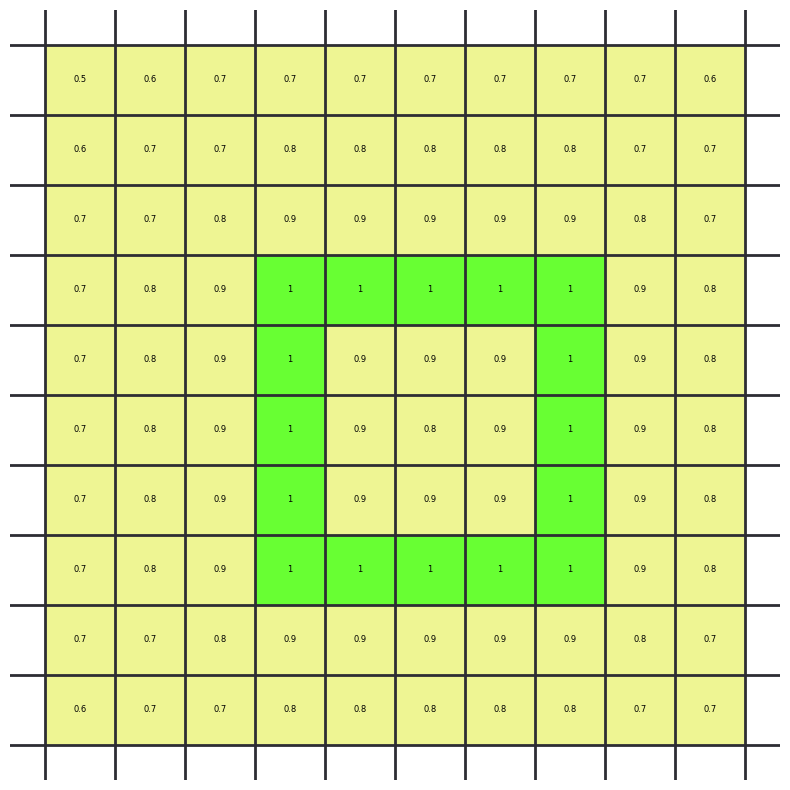

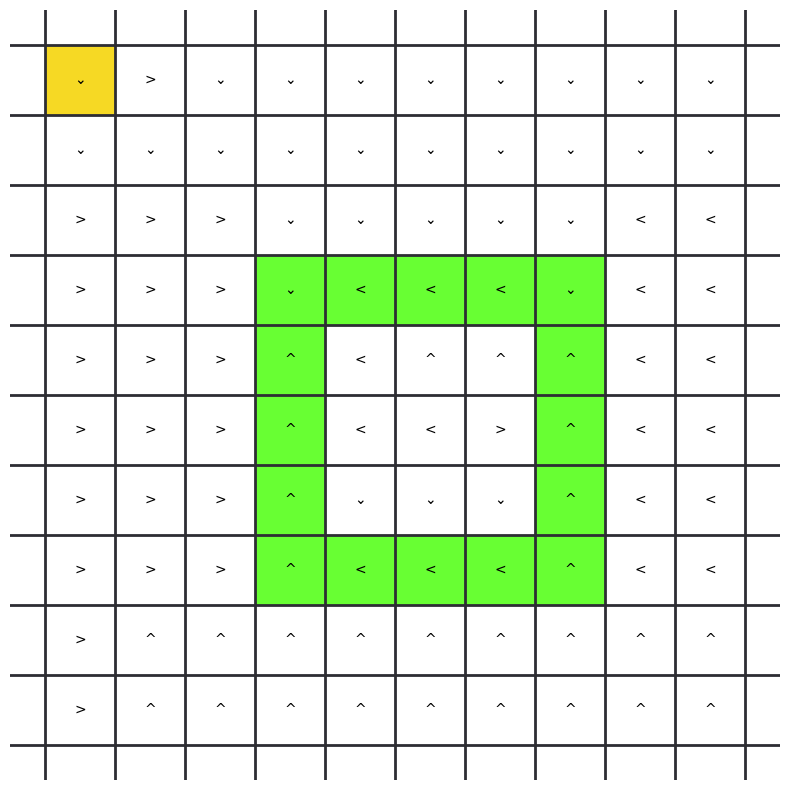

In [5]:
canvas = Canvas(rewards_board)
algorithm = DrawingSinglePolicy(algorithm_kind=Algorithm.POLICY_ITERATION).train(canvas, plot_policies=False)

# Visualización de los valores y de de la política
algorithm.canvas.plot_rainbow()
algorithm.canvas.plot_policy(algorithm.policy)

2024-05-12 15:56:20,002 [MainThread] [INFO]  Inicio del entrenamiento. Calculando la política óptima a partir de las recompensas...
2024-05-12 15:56:20,004 [MainThread] [INFO]  Ejecutando VALUE_ITERATION para resolver el MDP
2024-05-12 15:56:20,010 [MainThread] [INFO]  La ejecución de VALUE_ITERATION acaba de terminar. 8 fueron necesarias para alcanzar convergencia
2024-05-12 15:56:20,010 [MainThread] [INFO]  Fin del entrenamiento. Calculando la política óptima a partir de las recompensas...


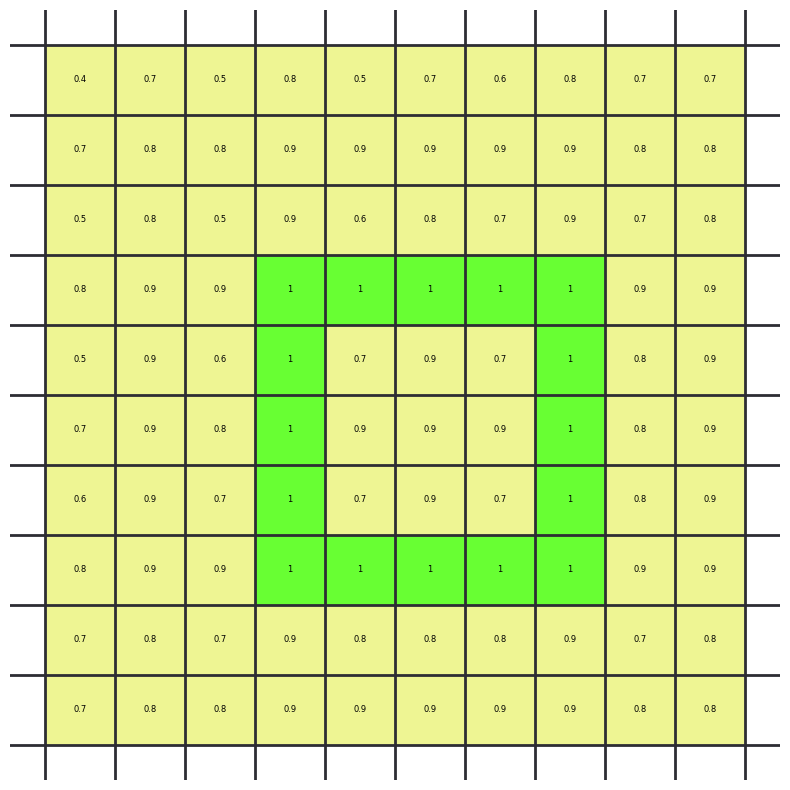

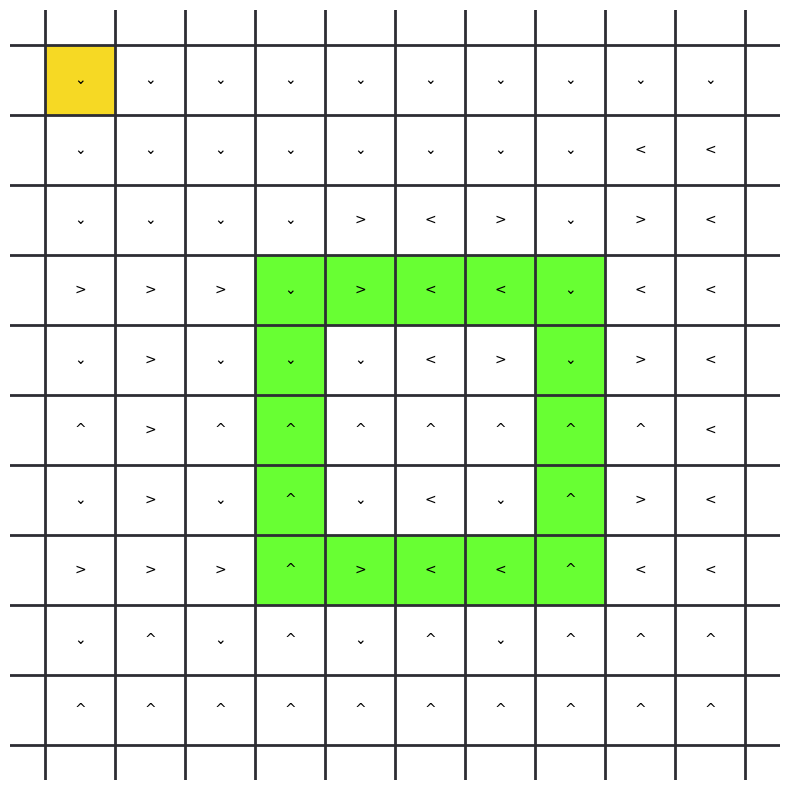

In [6]:
canvas = Canvas(rewards_board)
algorithm = DrawingSinglePolicy(algorithm_kind=Algorithm.VALUE_ITERATION).train(canvas, plot_policies=False)

# Visualización de los valores y de de la política
algorithm.canvas.plot_rainbow()
algorithm.canvas.plot_policy(algorithm.policy)